This notebook compares water greenness to aquatic vegetation greenness. Joints have already been done in QGIS.

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm
import seaborn as sns
from tqdm import tqdm
import numpy as np
import pandas as pd
import shapely
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import img_tiles

TODO: 
* Liu NDVI vars, compare best epoch to 1984-2019, other scatter plots
* Redo GLAKES-Liu join with all attributes as float type
* Then, fix PLD geometries and spatial join to HL (QGIS takes 60 min, try gpd)

# I/O

Vars are:

'trends_1984_2019_landsat_ABoVE_lake_greenness_sen_slope', \
'trends_1984_2019_landsat_ABoVE_lake_greenness_mann_kendall_trend',\
'trends_1984_2019_landsat_ABoVE_lake_greenness_trend_significance',\
'trends_1984_2019_landsat_ABoVE_lake_greenness_b2_mean',\
'trends_1984_2019_landsat_ABoVE_lake_greenness_b2_stddev'

In [2]:
pth_shp = "/Volumes/metis/Datasets/Liu_aq_veg/figshare/edk_out/join_hl_greenness/greennessx2.shp"

In [18]:
gdf = gpd.read_file(pth_shp, engine='pyogrio')

In [19]:
gdf.dropna(inplace=True)

In [22]:
gdf.rename(columns=dict(zip(['trends_198',	'trends_1_1',	'trends_1_2',	'trends_1_3',	'trends_1_4',], [
    'green_sen_slope',
    'green_mann_kendall_trend',
    'green_trend_significance',
    'green_b2_mean',
    'green_b2_stddev',
])), inplace=True)

In [23]:
gdf.columns

Index(['OBJECTID', 'Lake_id', 'Area_bound', 'Area_PW', 'Continent', 'Lat',
       'Lon', 'GFed_flag', 'PFed_flag', 'Endo_flag', 'Rser_flag', 'Shape_Leng',
       'Shape_Area', 'Liu MA_are', 'Liu MA_a_1', 'Liu MA_a_2', 'LEV_p3',
       'LEV_p1', 'LEV_p1p3in', 'Hylak_id', 'green_sen_slope',
       'green_mann_kendall_trend', 'green_trend_significance', 'green_b2_mean',
       'green_b2_stddev', 'geometry'],
      dtype='object')

In [5]:
gdf.head()

,OBJECTID,Lake_id,Area_bound,Area_PW,Continent,Lat,Lon,GFed_flag,PFed_flag,Endo_flag,...,LEV_p3,LEV_p1,LEV_p1p3in,Hylak_id,trends_198,trends_1_1,trends_1_2,trends_1_3,trends_1_4,geometry
0,3.0,3,82155.420436,79514.496612,North America,47.526368,-87.757371,0,0,0,...,0.008,0.008,0.000,8567.0,NaN,None,NaN,NaN,NaN,"POLYGON ((-92.00626 46.68239, -92.00653 46.682..."
1,8.0,8,30657.104741,28864.201812,North America,65.998658,-120.968462,0,1,0,...,0.003,0.001,0.002,2.0,-0.000011,no sig. trend,0.95,0.0247,0.0032,"POLYGON ((-119.5765 66.99075, -119.5765 66.990..."
2,11.0,11,26827.549399,25926.211686,North America,61.769419,-113.811408,0,1,0,...,0.090,0.048,0.042,3.0,-0.000300,no sig. trend,0.38,0.0595,0.0020,"POLYGON ((-111.128 62.3325, -111.12775 62.3325..."
3,16.0,16,17460.818811,16808.357727,Europe,60.829856,31.477989,0,0,0,...,0.090,0.112,-0.022,10.0,NaN,None,NaN,NaN,NaN,"POLYGON ((29.8255 61.20653, 29.82523 61.20653,..."
4,22.0,22,7586.525003,7274.643568,North America,59.191730,-109.345455,0,1,0,...,0.612,0.116,0.496,33.0,-0.000186,no sig. trend,0.16,0.0357,0.0013,"POLYGON ((-109.1455 59.60125, -109.14625 59.60..."


# Plot water greening versus macrophyte greening trends as scatter

<Axes: xlabel='LEV_p1p3in', ylabel='green_sen_slope'>

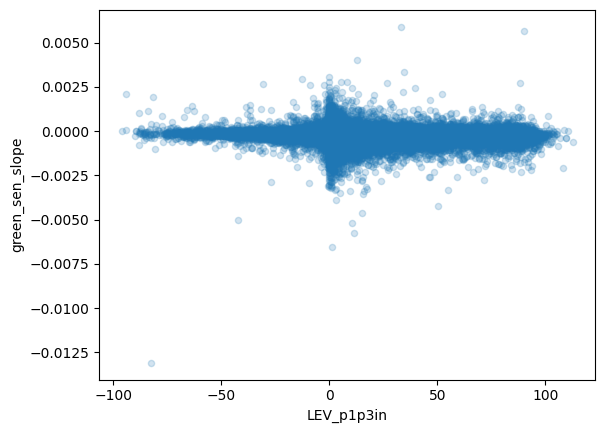

In [24]:
gdf.plot.scatter("LEV_p1p3in", "green_sen_slope", alpha=0.2)

(-0.002, 0.002)

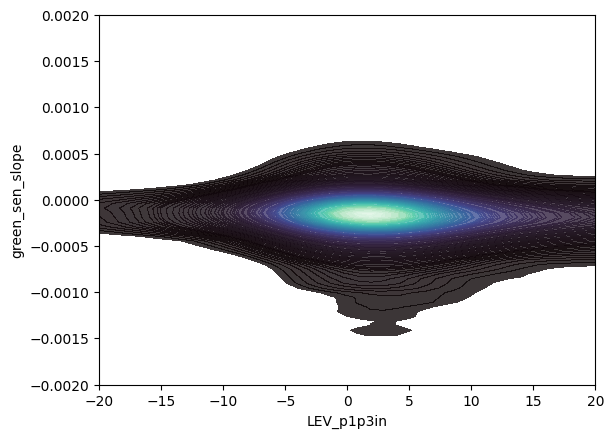

In [25]:
sns.kdeplot(
    data=gdf[::10],
    x="LEV_p1p3in",
    y="green_sen_slope",
    fill=True,
    cmap="mako",
    thresh=0.05,
    levels=100,
    alpha=0.8,
)
plt.xlim([-20, 20])
plt.ylim([-0.002, 0.002])

(0.0, 0.08)

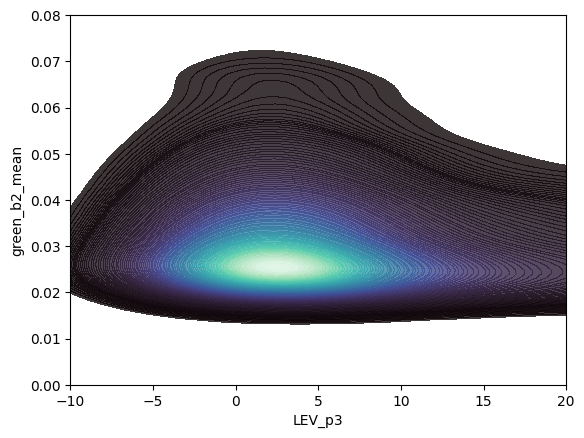

In [26]:
sns.kdeplot(
    data=gdf[::10],
    x="LEV_p3",
    y="green_b2_mean",
    fill=True,
    cmap="mako",
    thresh=0.05,
    levels=100,
    alpha=0.8,
)
plt.xlim([-10, 20])
plt.ylim([0, 0.08])

# Regional trends

<Axes: >

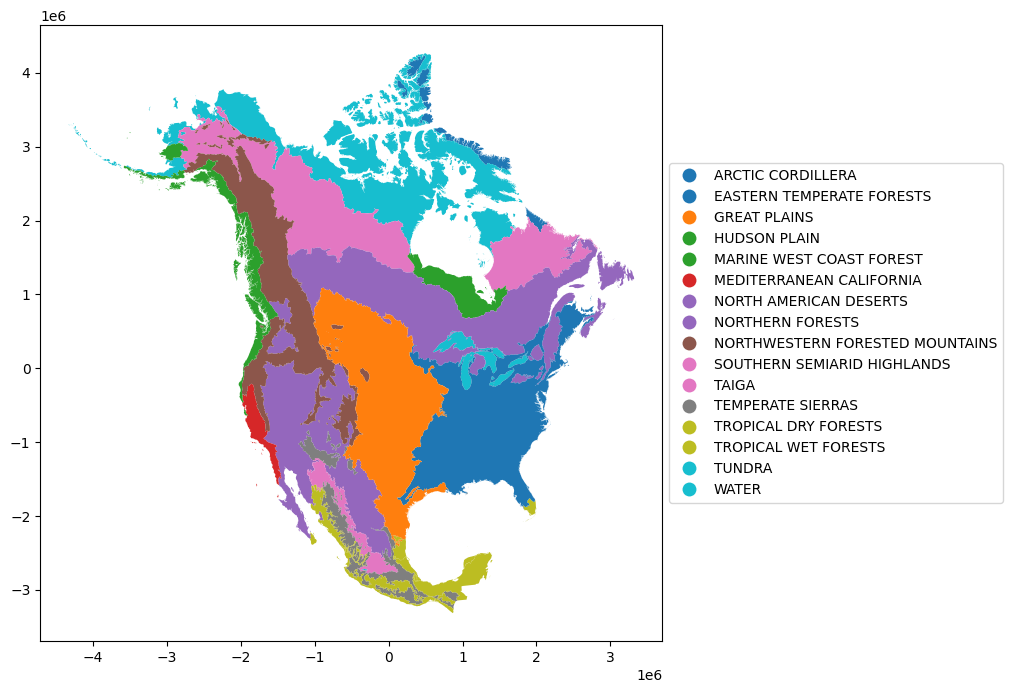

In [27]:
regions = gpd.read_file("/Volumes/thebe/Other/EPA_ecoregions_N_America/na_cec_eco_l1.zip")
fig, ax = plt.subplots(figsize=(10, 8))
regions.plot(
    column="NA_L1NAME",
    legend=True,
    ax=ax,
    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)},
)

Load finer grained version and only keep northern Eco regions

/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_4410/2539998249.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  regions = regions[regions.geometry.centroid.y > 50]


<Axes: >

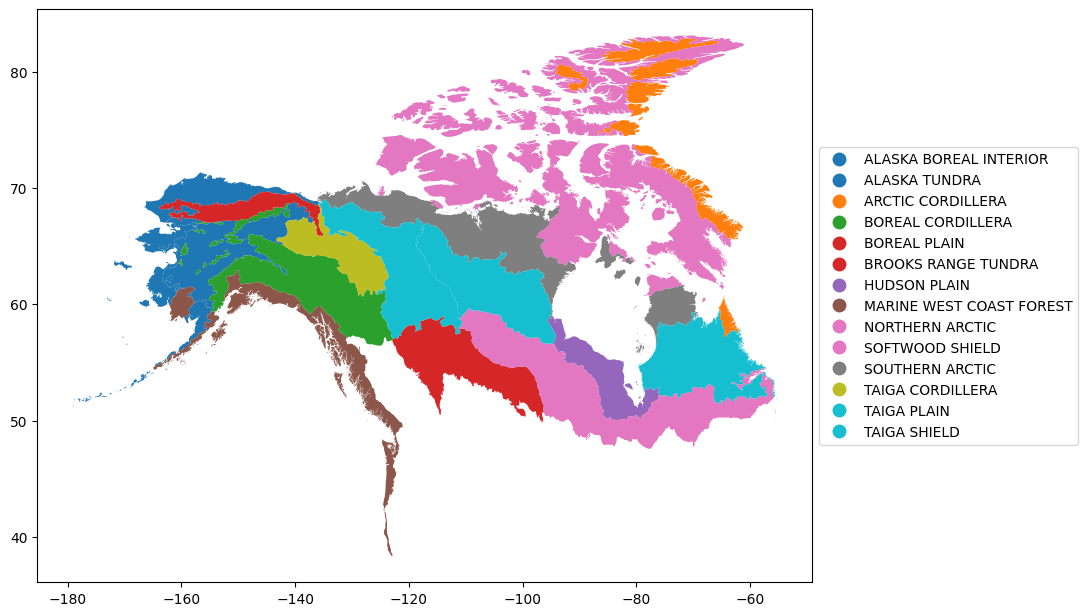

In [28]:
regions = gpd.read_file("/Volumes/thebe/Other/EPA_ecoregions_N_America/na_cec_eco_l2.zip")
regions = regions.to_crs("EPSG:4326")
regions = regions[regions.geometry.centroid.y > 50]
regions = regions.dissolve("NA_L2NAME").reset_index()
fig, ax = plt.subplots(figsize=(10, 8))
regions.plot(
    column="NA_L2NAME",
    legend=True,
    ax=ax,
    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)},
)

/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_4410/4001151516.py:7: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


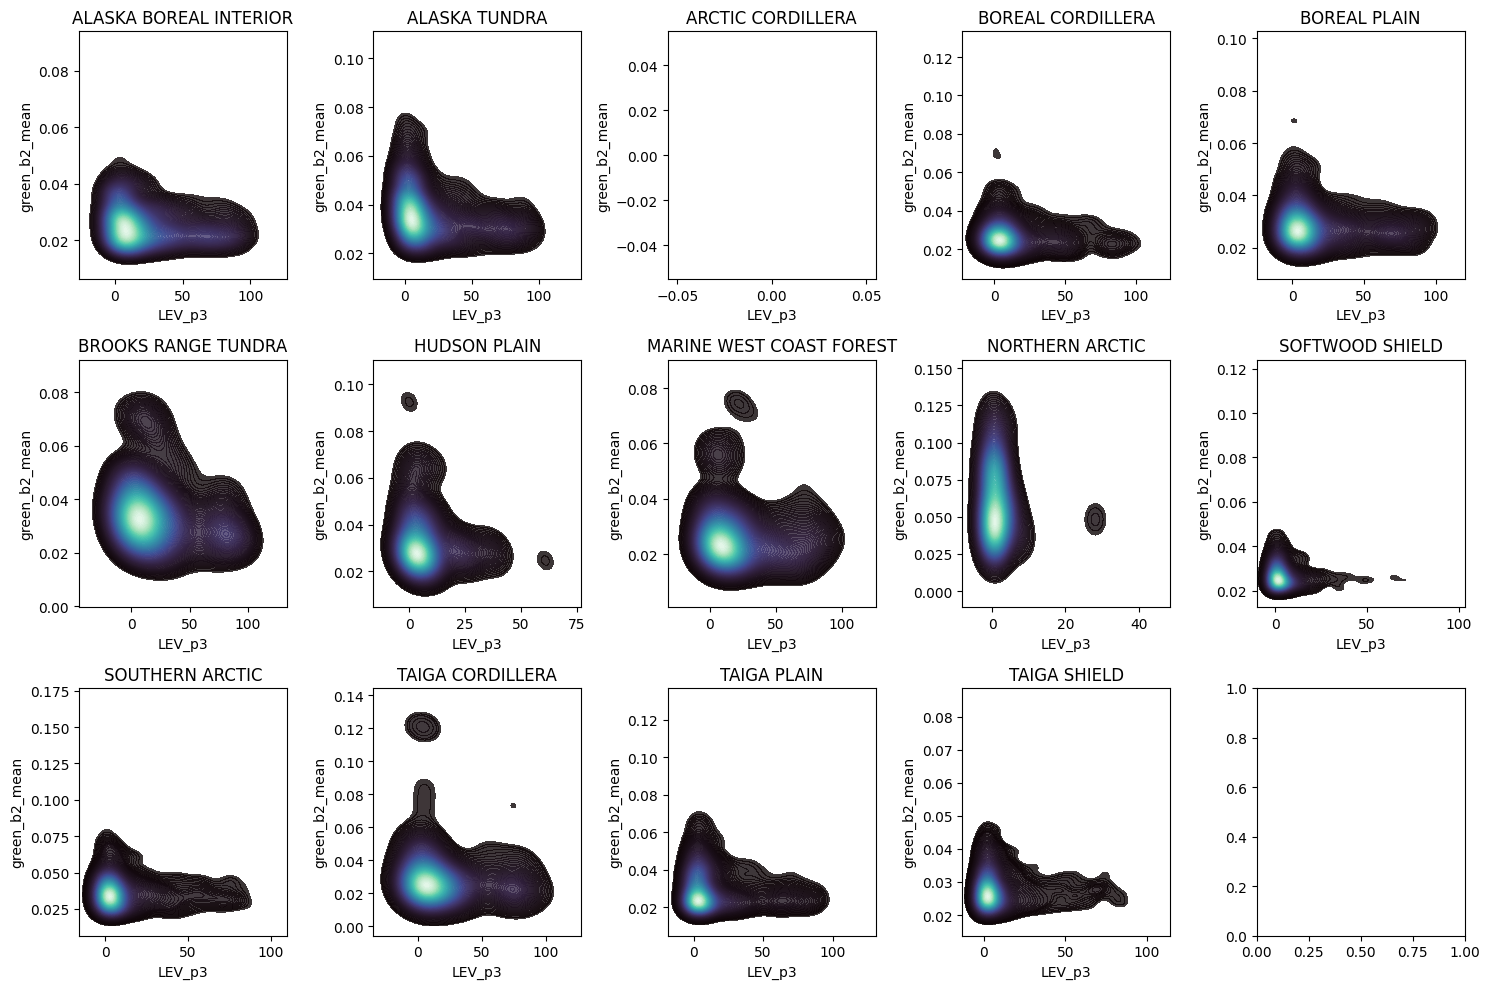

In [31]:
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.flatten()

for i, (idx, row) in enumerate(regions.iterrows()):
    region_geom = row.geometry
    mask = gdf[::10].within(region_geom)
    sns.kdeplot(
        data=gdf[::10][mask],
        x="LEV_p3",
        y="green_b2_mean",
        fill=True,
        cmap="mako",
        thresh=0.05,
        levels=100,
        alpha=0.8,
        ax=axes[i],
    )
    axes[i].set_title(row["NA_L2NAME"])

plt.tight_layout()

/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_4410/788922056.py:7: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


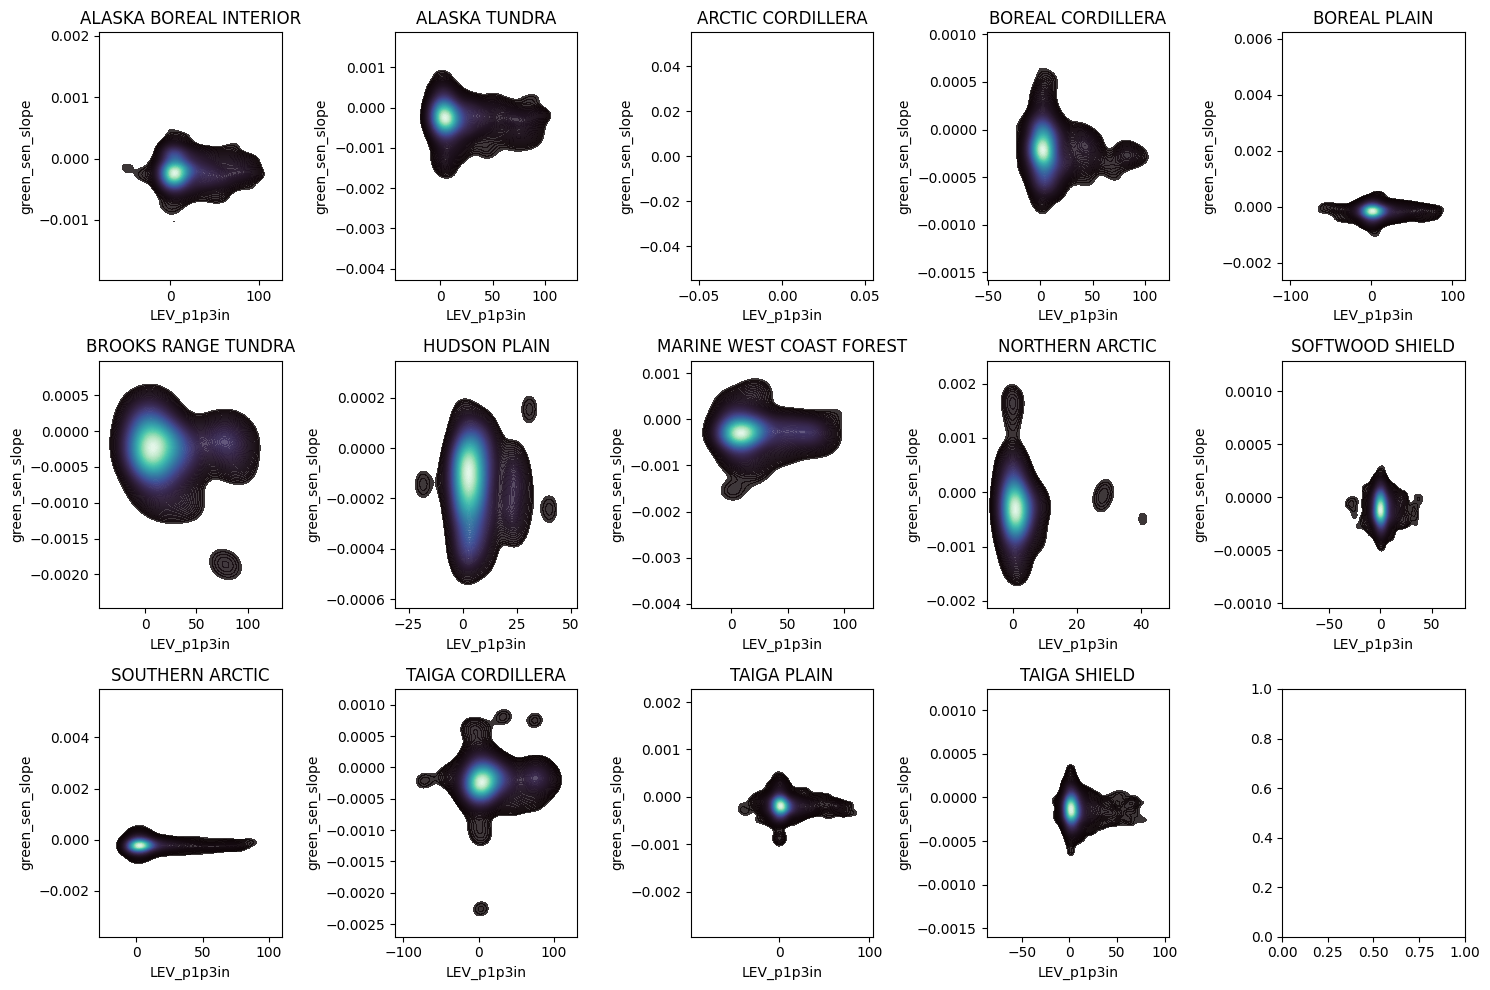

In [32]:
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.flatten()

for i, (idx, row) in enumerate(regions.iterrows()):
    region_geom = row.geometry
    mask = gdf[::10].within(region_geom)
    sns.kdeplot(
        data=gdf[::10][mask],
        x="LEV_p1p3in",
        y="green_sen_slope",
        fill=True,
        cmap="mako",
        thresh=0.05,
        levels=100,
        alpha=0.8,
        ax=axes[i],
    )
    axes[i].set_title(row["NA_L2NAME"])

plt.tight_layout()

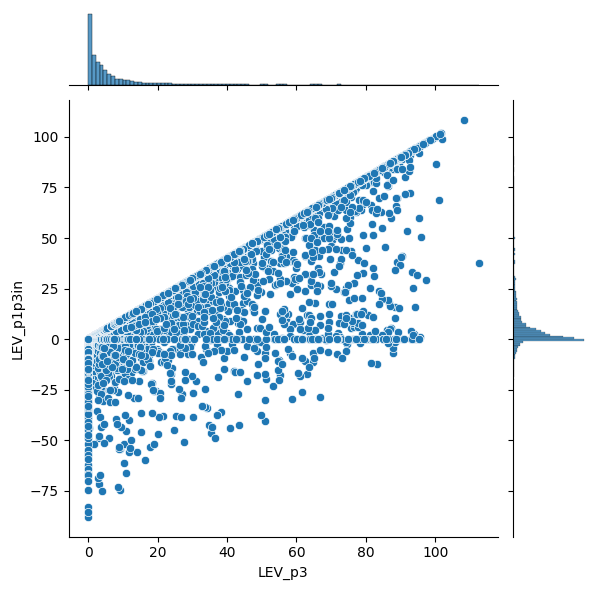

In [34]:
# plt.scatter(gdf.LEV_p3[::10], gdf.LEV_p1p3in[::10])
sns.jointplot(data=gdf[::10], x="LEV_p3", y="LEV_p1p3in")

In [ ]:
gdf_j = gpd.sjoin_nearest(gdf, regions[["NA_L1NAME", "geometry"]], how="left")

g = sns.FacetGrid(gdf_j[::10], col="NA_L1NAME", col_wrap=5, height=3.5)
g.map_dataframe(
    sns.kdeplot,
    x="LEV_p3",
    y="trends_1_3",
    fill=True,
    cmap="mako",
    thresh=0.05,
    levels=100,
    alpha=0.8,
)

/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


# Make map

In [38]:
# Define the Canada Albers Equal Area Conic projection manually (ESRI:102001)
canada_albers = ccrs.AlbersEqualArea(
    central_longitude=-96,
    central_latitude=61,
    standard_parallels=(50, 70),
    false_easting=0,
    false_northing=0,
)

<GeoAxes: >

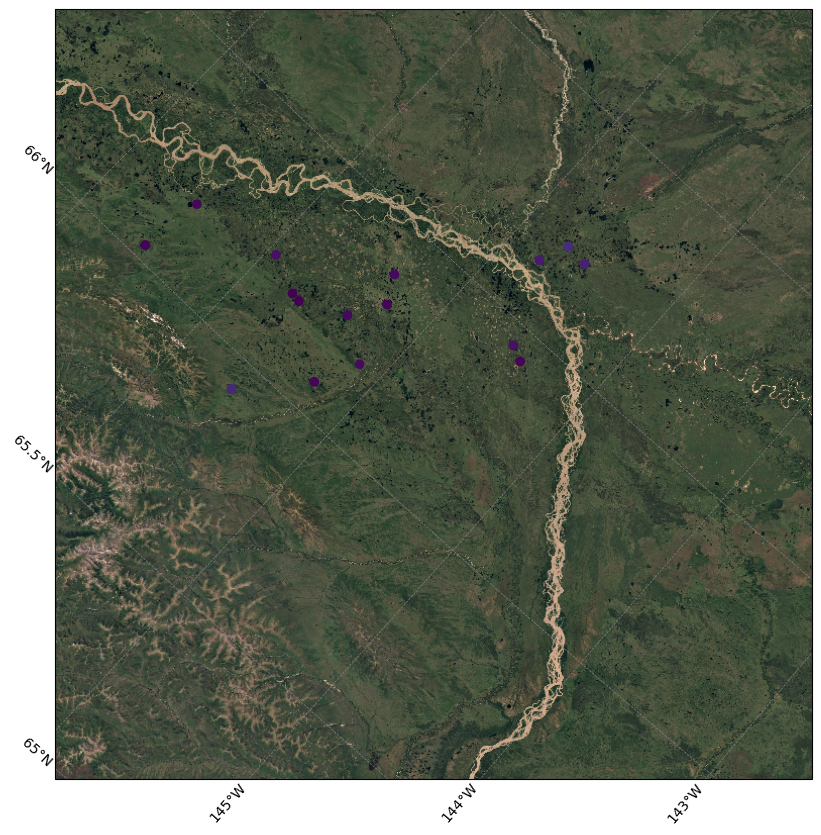

In [66]:
## Plot
# Use Google imagery as basemap
imagery = img_tiles.GoogleTiles(style="satellite")
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": canada_albers})
zoom = 4

# zoom in
window1 = [-147, -144.4, 65.5, 67]  # [xmin, xmax, ymin, ymax]
ax.set_extent(window1, crs=ccrs.PlateCarree())
zoom = 10

ax.add_image(imagery, zoom)  # Adjust zoom level (higher = more detail)

# Add coastlines for reference
ax.coastlines()

# Add gridlines with latitude/longitude labels
gridlines = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
gridlines.top_labels = False  # Hide top labels
gridlines.right_labels = False  # Hide right labels

gdf_merged_joined.plot(
    c=gdf_merged_joined.LEVp3,
    ax=ax,
    transform=ccrs.PlateCarree(),
    # cmap="BuGn",
    # legend=True,
    vmin=0,
    vmax=0.1,
)